<h1 style='font-size: 45px; color: crimson; font-family: Dubai; font-weight: 600'>A/B Testing Analysis of Herbicide Effectiveness</h1>

The goal of this analysis is to evaluate the effectiveness of a new herbicide compared to an existing one in controlling weeds and improving crop yields.

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Import Required Libraries</h1>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import squarify 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, levene, stats, ttest_ind
from scipy.stats import probplot  
from itertools import combinations

print('Libraries loaded Succesfully')

Libraries loaded Succesfully


<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Loading Dataset</h1>

In [125]:
data = pd.read_csv('../Datasets/herbicide_data.csv')
data.head()

,Herbicide_Type,Reduction (%),Crop_Yield (kg/plot),Soil_Type,Weather_Conditions,Treatment_Duration (days)
0,New,65.553988,257.278544,Loamy,Dry,13.955628
1,Old,44.375456,213.448793,Loamy,Rainy,14.091753
2,Old,30.769262,252.163982,Sandy,Dry,8.138781
3,Old,40.237435,205.429490,Loamy,Rainy,11.910558
4,New,84.196834,295.588641,Clay,Dry,7.716332


In [126]:
data.Herbicide_Type.unique()

array(['New', 'Old'], dtype=object)

In [127]:
data.Herbicide_Type.value_counts()

Herbicide_Type
Old    259
New    241
Name: count, dtype: int64

<H1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Exploring Data Distribution</H1>

- To understand the distribution of the data and spot any potential anomalies.

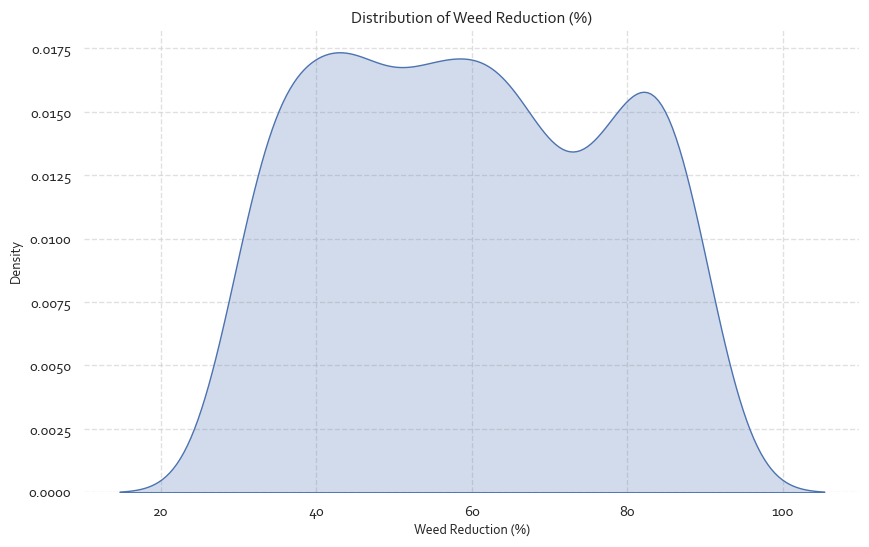

In [140]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.kdeplot(data=data, x='Reduction (%)', fill=True)
plt.title('Distribution of Weed Reduction (%)', fontsize=12)
plt.xlabel('Weed Reduction (%)', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.grid(linestyle='--', alpha=0.6)

for spine in ax.spines.values():
        spine.set_visible(False)

plt.savefig('../Results/Figures/AB102000000001.png', dpi=900)
plt.show()

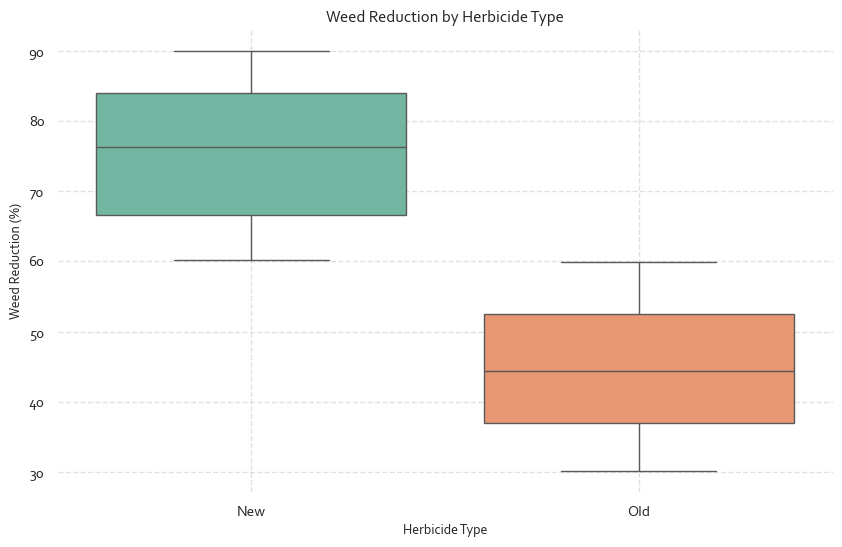

In [154]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.boxplot(x='Herbicide_Type', y='Reduction (%)', hue='Herbicide_Type', data=data, palette="Set2")
plt.title('Weed Reduction by Herbicide Type', fontsize=12)
plt.xlabel('Herbicide Type', fontsize=10)
plt.ylabel('Weed Reduction (%)', fontsize=10)
plt.grid(linestyle='--', alpha=0.6)
for spine in ax.spines.values():
        spine.set_visible(False)
    
plt.savefig('../Results/Figures/AB102000000004.png', dpi=900)
plt.show()

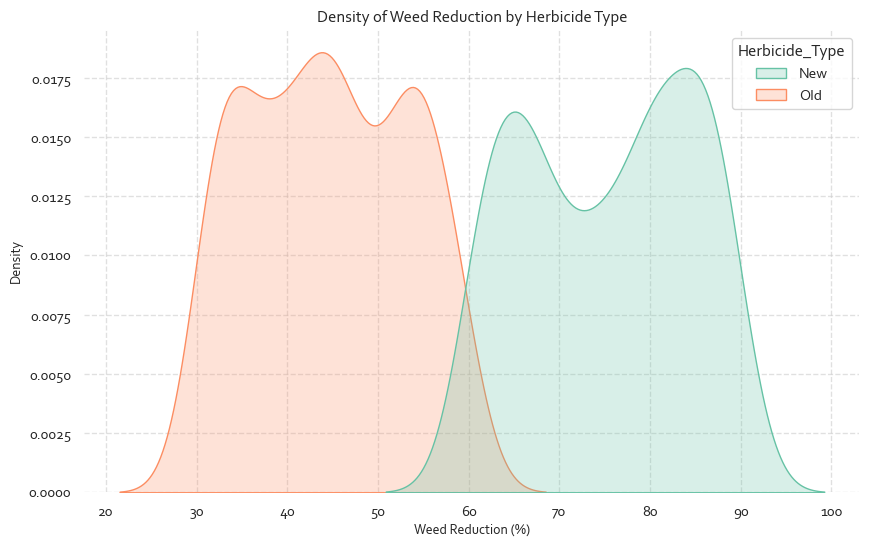

In [155]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

fig, ax = plt.subplots(figsize=(10, 6)) 
sns.kdeplot(data=data, x='Reduction (%)', hue='Herbicide_Type', fill=True, palette="Set2")
plt.title('Density of Weed Reduction by Herbicide Type', fontsize=12)
plt.xlabel('Weed Reduction (%)', fontsize=10)
plt.ylabel('Density', fontsize=10)

plt.grid(linestyle='--', alpha=0.6)

for spine in ax.spines.values():
        spine.set_visible(False)

plt.savefig('../Results/Figures/AB102000000005.png', dpi=900)
plt.show()


<H1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Statistics Descriptions of the data</H1>


In [143]:
Summary_statistics= data.describe()
Summary_statistics.to_csv('../Results/Summary_statistics.csv', index=False)
Summary_statistics

,Reduction (%),Crop_Yield (kg/plot),Treatment_Duration (days)
count,500.000000,500.000000,500.000000
mean,59.397468,268.779298,9.886413
std,17.814749,45.636533,2.851467
min,30.096548,162.528305,5.000307
25%,43.928807,236.256841,7.520263
50%,58.934059,267.739341,9.830763
75%,75.466228,302.136329,12.181577
max,89.913735,372.598082,14.955689


In [161]:
Groupstas = data.groupby('Herbicide_Type')[['Reduction (%)', 'Crop_Yield (kg/plot)', 'Soil_Type','Weather_Conditions', 'Treatment_Duration (days)']]
Groupstas = Groupstas.describe().T   
Groupstas.to_csv('../Results/Herbicide_Type_summary_stats.csv', index=False)
Groupstas.head(10)

Herbicide_Type                     New         Old
Reduction (%)        count  241.000000  259.000000
                     mean    75.332578   44.569818
                     std      9.277838    8.708537
                     min     60.148199   30.096548
                     25%     66.636283   36.900403
                     50%     76.237997   44.440325
                     75%     84.017601   52.466973
                     max     89.913735   59.890030
Crop_Yield (kg/plot) count  241.000000  259.000000
                     mean   299.669931  240.035503

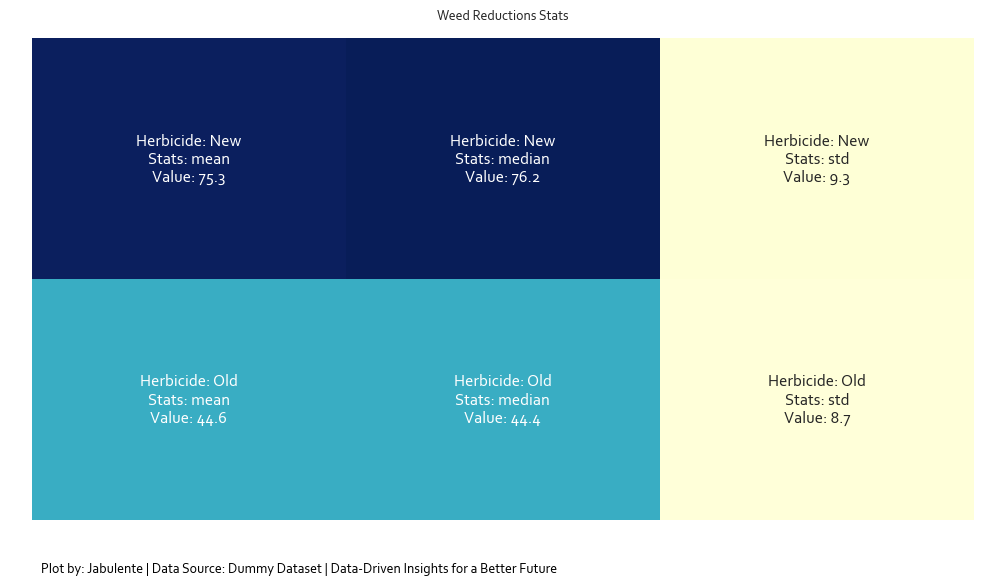

In [141]:
reduction_stats = data.groupby('Herbicide_Type')['Reduction (%)'].agg(['mean', 'median', 'std'])
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})
annotations = reduction_stats.astype(str)

for row in annotations.index:
    for col in annotations.columns:
        annotations.loc[row, col] = f"Herbicide: {row}\nStats: {col}\nValue: {reduction_stats.loc[row, col]:.1f}"

plt.figure(figsize=(10, 6))
sns.heatmap(reduction_stats, annot=annotations.values, fmt="", cmap="YlGnBu", cbar=False,linewidths=0.002 )
plt.title("Weed Reductions Stats", fontsize=10, pad=14)
plt.xlabel(" ")
plt.ylabel(" ")

text = "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future "
plt.text(0.01, -0.1, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.savefig('../Results/Figures/AB102000000002.png', dpi=900)

plt.show()

<H1 style='font-size: 30px; color: crimson; font-family: Dubai; font-weight: 600'>Efficiency of New Herbicides Compared to Old ones</H1>


To determine the efficiency of new herbicides compared to old ones in reducing weed coverage

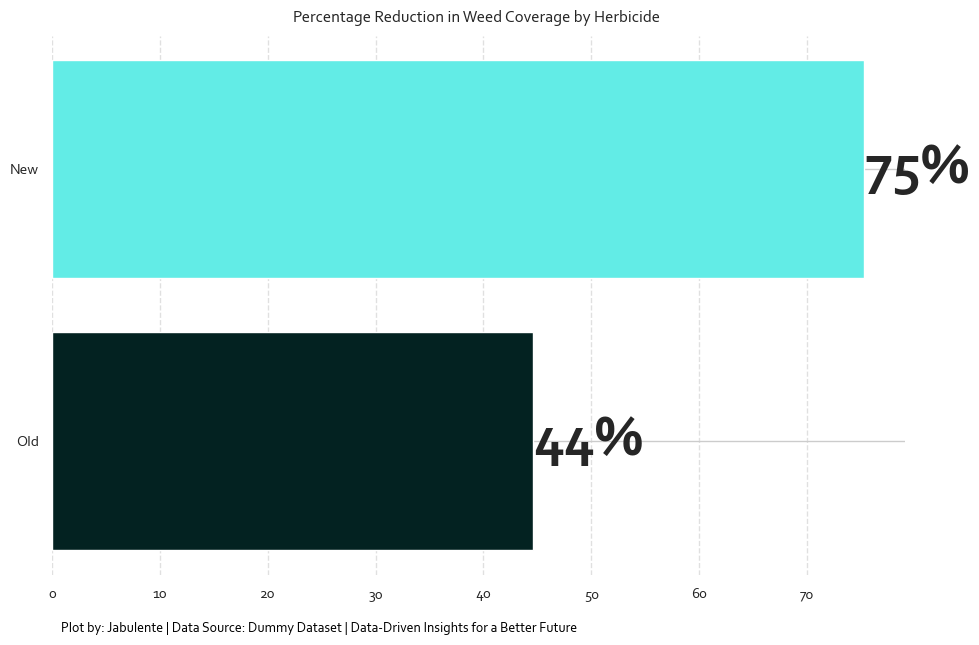

In [151]:
Weed_Reduction = (data.groupby(['Herbicide_Type'])['Reduction (%)'].mean().reset_index(name='Reduction (%)').sort_values(by='Reduction (%)'))
total_reviews = Weed_Reduction['Reduction (%)'].sum()

plt.figure(figsize=(11, 7))
bars = plt.barh(Weed_Reduction['Herbicide_Type'], Weed_Reduction['Reduction (%)'], color=['#032221', '#62ECE6'], label='Sentiment')

for bar in bars:
    Percentage = bar.get_width()
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(Percentage)}%', va='center', ha='left', fontsize=42, fontweight='bold')
plt.title('Percentage Reduction in Weed Coverage by Herbicide ', fontsize=12, pad=10)
plt.xlabel('')
plt.ylabel('')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

text = "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future "
plt.text(0.01, -0.1, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.savefig('../Results/Figures/AB102000000003.png', dpi=900)
plt.show()

The results clearly indicate a  difference in the effectiveness of the two herbicides in reducing weed coverage. The new herbicide, on average, led to a `75.33%` reduction in weed coverage, while the old herbicide resulted in a comparatively lower reduction of `44.57%`. This suggests that the new herbicide is significantly more effective in controlling weeds, achieving a reduction that is approximately 30.8 percentage points higher than the old herbicide. This difference in performance could potentially translate into better crop yields, assuming the weed control directly influences yield. However, further analysis, such as correlation with crop yield and statistical testing for significance, would be needed to confirm whether the observed difference is statistically significant and to evaluate the broader implications for agricultural productivity.

<h1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Statistical Testing (Statistical Significance)</h1>
To examine the overall variation in crop yield across different groups, ensuring that the differences observed were not due to random chance. Perform T-test and assess whether there were statistically significant differences in crop yield based on different fertilizer types.

<h2 style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>Normality Tests (q-q plot)</h2>

- ***Q-Q Plot : The Q-Q plot is used to assess if the yield data follows a normal distribution.***


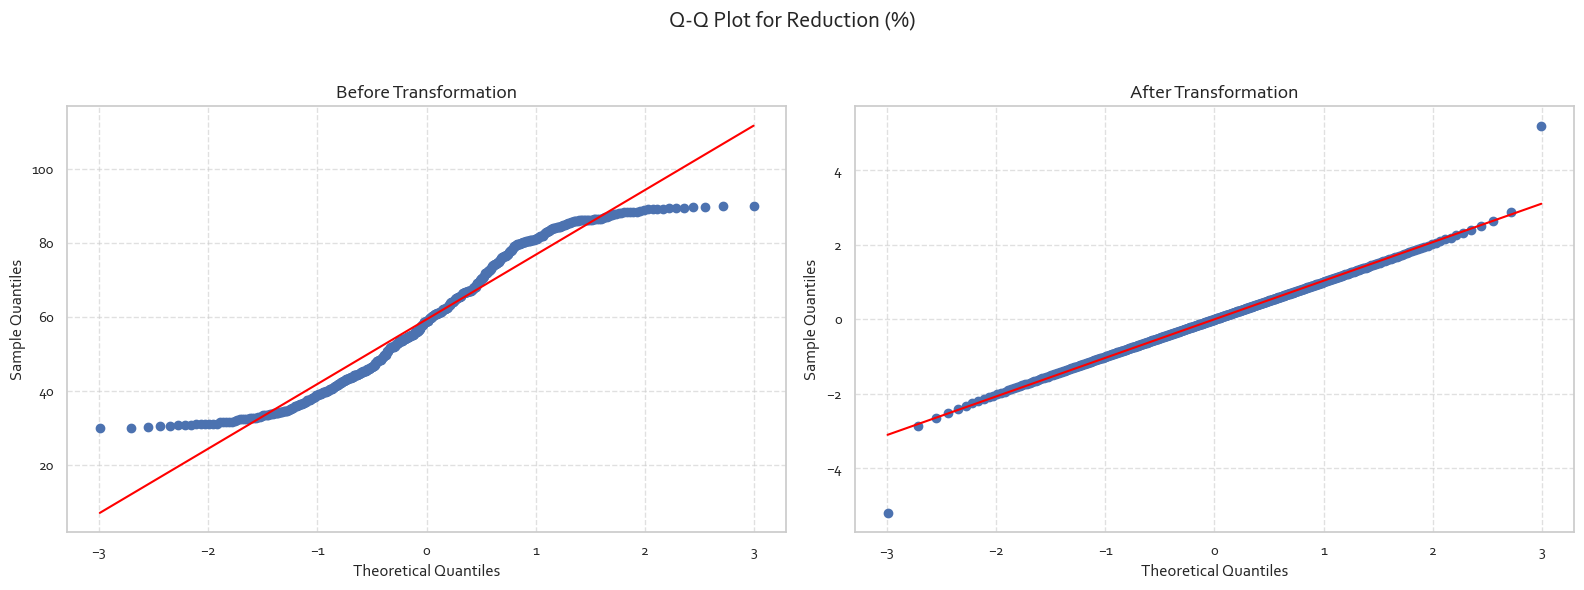

In [163]:
import scipy.stats as stats
from sklearn.preprocessing import QuantileTransformer
Variable = ['Reduction (%)']

# Set seaborn theme for aesthetics
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

# Initialize Quantile Transformer
qt = QuantileTransformer(output_distribution='normal', n_quantiles=min(940, len(data)), random_state=42)

# Loop through numeric columns
for column in Variable:
    # Apply transformation
    transformed_data = qt.fit_transform(data[column].values.reshape(-1, 1)).flatten()
    
    # Create subplots for original and transformed data
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Q-Q Plot for {column}', fontsize=16)
    
    # Q-Q Plot for original data
    stats.probplot(data[column], dist="norm", plot=axes[0])
    axes[0].get_lines()[1].set_color('red')  # Set the line of best fit to red
    axes[0].set_title('Before Transformation', fontsize=14)
    axes[0].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[0].set_ylabel('Sample Quantiles', fontsize=12)
    axes[0].grid(linestyle='--', alpha=0.6)
    
    # Q-Q Plot for transformed data
    stats.probplot(transformed_data, dist="norm", plot=axes[1])
    axes[1].get_lines()[1].set_color('red')  # Set the line of best fit to red
    axes[1].set_title('After Transformation', fontsize=14)
    axes[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    axes[1].set_ylabel('Sample Quantiles', fontsize=12)
    axes[1].grid(linestyle='--', alpha=0.6)
    
    # Adjust layout and display the plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for the main title
    plt.savefig('../Results/Figures/AB102000000006.png', dpi=900)
    
    plt.show()

<h2 style='font-size: 25px; color: crimson; font-family: Dubai; font-weight: 600'>Data Transformation (Quantile Transformation)</h2>

In [22]:
dt = data.copy()
for col in numerical_cols:
    dt[col] = qt.fit_transform(dt[col].values.reshape(-1, 1)).flatten()

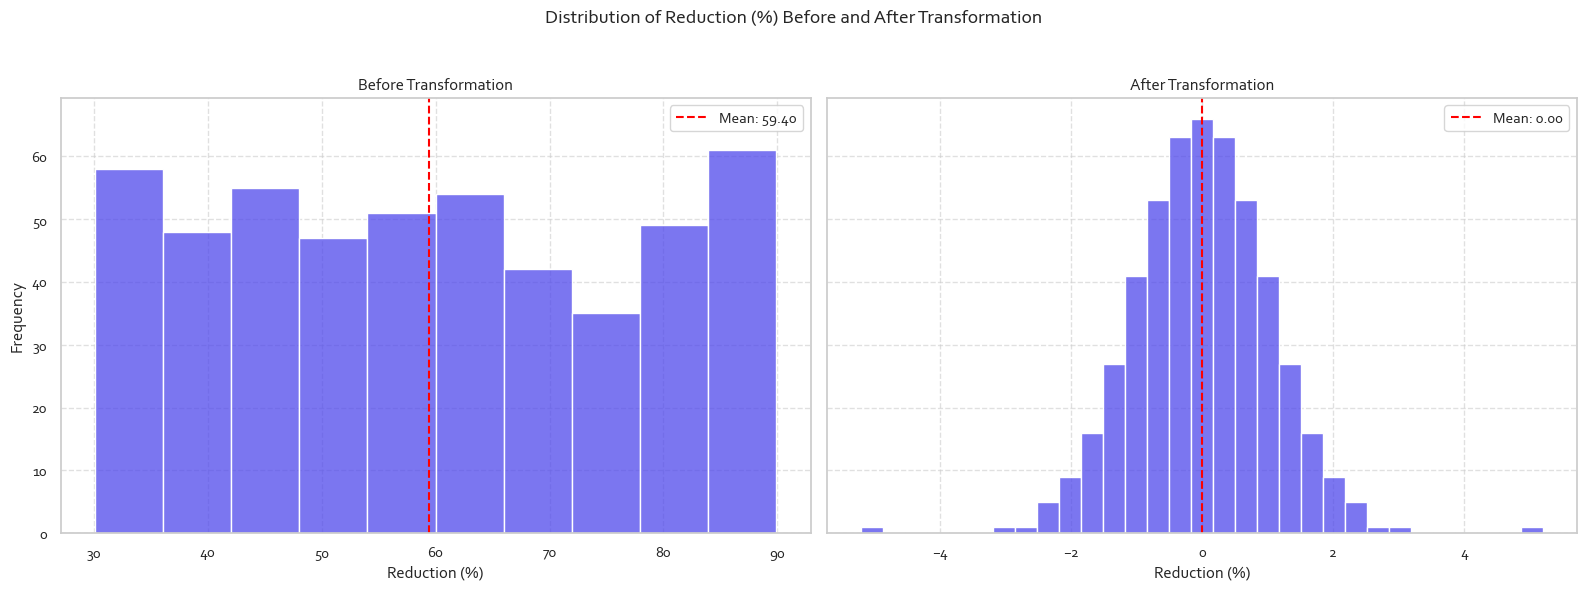

In [164]:
from sklearn.preprocessing import QuantileTransformer

Variable = ['Reduction (%)']
plt.rcParams.update({'font.family': 'Corbel', 'font.style': 'normal', 'font.size': 11 })

# Quantile Transformer instance
qt = QuantileTransformer(output_distribution='normal',  n_quantiles=min(940, len(data)), random_state=42)

# Loop through numeric columns
for column in Variable:
    # Create a new figure for each variable
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    fig.suptitle(f'Distribution of {column} Before and After Transformation', fontsize=14)
    
    # Plot the original distribution
    sns.histplot(data[column], ax=axes[0], fill=True, color="#4F48EC")
    axes[0].set_title(f"Before Transformation", fontsize=12)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Frequency")
    mean_value_before = data[column].mean()
    axes[0].axvline(mean_value_before, color='red', linestyle='--', label=f'Mean: {mean_value_before:.2f}')
    axes[0].legend()
    axes[0].grid(linestyle='--', alpha=0.6)

    # Apply transformation
    transformed_column = qt.fit_transform(data[column].values.reshape(-1, 1)).flatten()
    
    # Plot the transformed distribution
    sns.histplot(transformed_column, ax=axes[1], fill=True, color="#4F48EC")
    axes[1].set_title(f"After Transformation", fontsize=12)
    axes[1].set_xlabel(column)
    mean_value_after = transformed_column.mean()
    axes[1].axvline(mean_value_after, color='red', linestyle='--', label=f'Mean: {mean_value_after:.2f}')
    axes[1].legend()
    axes[1].grid(linestyle='--', alpha=0.6)

    # Save figure
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout for title
    plt.savefig('../Results/Figures/AB102000000007.png', dpi=900)
    plt.show()

<H2 style='font-size: 30px; color: crimson; font-family: Dubai; font-weight: 600'>Mannwhitney test - Non Parametric Tests</H2>

In [166]:
from scipy.stats import mannwhitneyu
from itertools import combinations

def iterative_mannwhitney_tests(data, group_column, value_column):
    unique_groups = data[group_column].unique()
    group_combinations = list(combinations(unique_groups, 2))

    results = []

    for group1, group2 in group_combinations:
        # Filter data for the two groups
        group1_data = data[data[group_column] == group1][value_column]
        group2_data = data[data[group_column] == group2][value_column]

        # Perform Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')

        # Append results
        results.append({
            'Group 1': group1,
            'Group 2': group2,
            'U-Statistic': u_stat,
            'P-Value': p_value
        })

    # Convert results to a DataFrame
    results_data = pd.DataFrame(results)
    return results_data

mannwhitney_results = iterative_mannwhitney_tests(data, group_column='Herbicide_Type', value_column='Reduction (%)')
mannwhitney_results

,Group 1,Group 2,U-Statistic,P-Value
0,New,Old,62419.0,2.849286e-83



<H2 style='font-size: 30px; color: crimson; font-family: Dubai; font-weight: 600'>T-test -Parametric Test</H2>

In [167]:
 def iterative_t_tests(df, group_column, value_column):
    unique_groups = df[group_column].unique()
    group_combinations = list(combinations(unique_groups, 2))
    
    results = []
    
    for group1, group2 in group_combinations:
        # Filter data for the two groups
        group1_data = df[df[group_column] == group1][value_column]
        group2_data = df[df[group_column] == group2][value_column]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1_data, group2_data, equal_var=False)
        
        # Append results
        results.append({
            'Group 1': group1,
            'Group 2': group2,
            'T-Statistic': t_stat,
            'P-Value': p_value
        })
    
    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

t_test_results = iterative_t_tests(data, group_column='Herbicide_Type', value_column='Reduction (%)')
t_test_results

,Group 1,Group 2,T-Statistic,P-Value
0,New,Old,38.156962,1.023018e-148


<span style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>T-test Results</span>


The t-statistic of **38.16** and a p-value of **1.02e-148** indicate that there is a highly significant difference between the effectiveness of the new and old herbicides in reducing weed coverage. Therefore, we can confidently reject the null hypothesis that there is no difference between the two herbicides. This means that the new herbicide is significantly more effective in reducing weed coverage compared to the old herbicide.

<H1 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Effect Size Assessment (Cohen’s d)</H1>

- To calculate Cohen’s d to measure the magnitude of differences in Weed_Reduction (%) between **OLD** and **NEW** herbicide.

In [168]:
def cohens_d(group1, group2):
    # Calculate Cohen's d for independent samples
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    pooled_std = np.sqrt(((std1 ** 2) + (std2 ** 2)) / 2)
    return (mean1 - mean2) / pooled_std
def interpret_cohens_d(d_value):
    """Interpret Cohen's d value and provide an explanation."""
    if abs(d_value) < 0.2:
        interpretation = "Small effect size"
        explanation = "There is a small difference between the groups, and the effect is minimal."
    elif 0.2 <= abs(d_value) < 0.5:
        interpretation = "Medium effect size"
        explanation = "The difference between the groups is moderate, with noticeable effects."
    elif 0.5 <= abs(d_value) < 0.8:
        interpretation = "Large effect size"
        explanation = "There is a large difference between the groups, with a strong effect."
    else:
        interpretation = "Very large effect size"
        explanation = "The difference between the groups is very large, indicating a very strong effect."
    return interpretation, explanation

In [169]:
fertilizer_groups = data['Herbicide_Type'].unique()  # Get unique fertilizers
cohen_results = {}

for i in range(len(fertilizer_groups)):
    for j in range(i + 1, len(fertilizer_groups)):  # Ensure each pair is unique
        group1 = data[data['Herbicide_Type'] == fertilizer_groups[i]]['Reduction (%)']
        group2 = data[data['Herbicide_Type'] == fertilizer_groups[j]]['Reduction (%)']
        
        # Calculate Cohen's d for this pair
        d_value = cohens_d(group1, group2)
        pair = (fertilizer_groups[i], fertilizer_groups[j])
        cohen_results[pair] = d_value

cohen_data = pd.DataFrame(list(cohen_results.items()), columns=['Pair', 'Cohens d'])
cohen_data['Interpretation'] = cohen_data['Cohens d'].apply(interpret_cohens_d)
pd.set_option('display.max_colwidth', 120) #Increase the max_colwidth value to avoid truncation
cohen_data

,Pair,Cohens d,Interpretation
0,"(New, Old)",3.418961,"(Very large effect size, The difference between the groups is very large, indicating a very strong effect.)"


<span style='font-size: 23px; color: crimson; font-family: Dubai; font-weight: 600'>T-Cohens d Results Interpretation</span>

Cohen's d value of 3.42 indicates a very large effect size, which suggests that the difference between the new and old herbicides in terms of weed coverage reduction is substantial. This reinforces the findings from the t-test, demonstrating not only statistical significance but also the magnitude of the difference. The very large effect size further supports the conclusion that the new herbicide is highly effective at reducing weed coverage, making it a potentially superior choice for weed management in agricultural practices.

<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Conclusion Summary</h2>

The A/B testing experiment comparing the new and old herbicides for weed control has yielded significant results. The new herbicide demonstrated a **substantial improvement in weed reduction (75.33%) compared to the old herbicide (44.57%)**, with a highly significant statistical difference supported by a p-value of $1.02 \times 10^{-148}$. The effect size, measured by Cohen's d, was exceptionally large (**3.42**), indicating a profound impact of the new herbicide over the old one.

Overall, the new herbicide is significantly more effective in reducing weed prevalence and boosting crop yield, making it a superior choice for weed management. This evidence strongly supports its adoption for enhanced agricultural outcomes.

<h2 style='font-size: 65px; color: crimson; font-family: Dubai; font-weight: 600; text-align: center;'>THE END</h2>
